# Remove the uneven illumination from a microscope image using least squares fitting like we did at the lecture.


In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

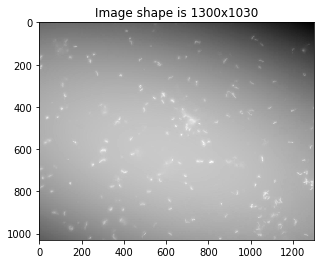

In [2]:
# Read the data

img = imread("uneven_illumination.jpg")
plt.imshow(img, cmap='gray')
plt.title("Image shape is %dx%d" % (img.shape[1], img.shape[0]))
plt.show()

In [3]:
# Create the X-Y coordinate pairs in a matrix
X, Y = np.meshgrid(range(1300), range(1030))
Z = img

x = X.ravel()
y = Y.ravel()
z = Z.ravel()

# ********* TODO 1 **********
 Create data matrix  
 Use function "np.column_stack".  
 Function "np.ones_like" creates a vector like the input.  

In [4]:
H = np.column_stack([x*x, y*y, x*y, x, y, np.ones_like(x)])
print(H)

[[      0       0       0       0       0       1]
 [      1       0       0       1       0       1]
 [      4       0       0       2       0       1]
 ...
 [1682209 1058841 1334613    1297    1029       1]
 [1684804 1058841 1335642    1298    1029       1]
 [1687401 1058841 1336671    1299    1029       1]]


# ********* TODO 2 **********  
 Solve coefficients  
 Use np.linalg.lstsq  
 Put coefficients to variable "theta" which we use below.  

In [5]:
theta, b, c, d = np.linalg.lstsq(H, z, rcond=None)

In [6]:
# Predict
z_pred = H @ theta
Z_pred = np.reshape(z_pred, X.shape)

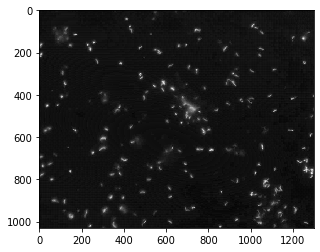

In [7]:
# Subtract & show
S = Z - Z_pred
plt.imshow(S, cmap = 'gray')
plt.show()